In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
unit_cat = np.array([[15, 13, 8], [13, 77, 9], [14, 27, 27]])

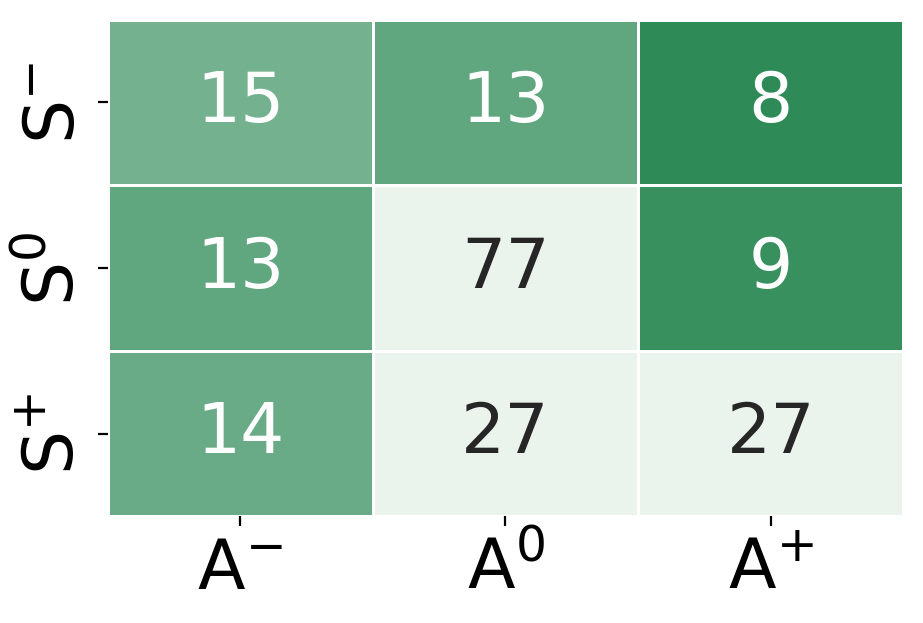

In [23]:
fig, axs = plt.subplots(1, 1, constrained_layout=1, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

use_cmap = sns.light_palette("seagreen", as_cmap=True, reverse=True, n_colors=20)

heatmap = sns.heatmap(unit_cat, ax=axs, cbar=0, annot=True, 
                      linewidth=.5, cmap=use_cmap, vmax=27, 
                      vmin=8, annot_kws={"fontsize":25})
axs.set_xticklabels(['A$^{-}$', 'A$^{0}$', 'A$^{+}$'], fontsize=25)
axs.set_yticklabels(['S$^{-}$', 'S$^{0}$', 'S$^{+}$'], fontsize=25)

plt.show();


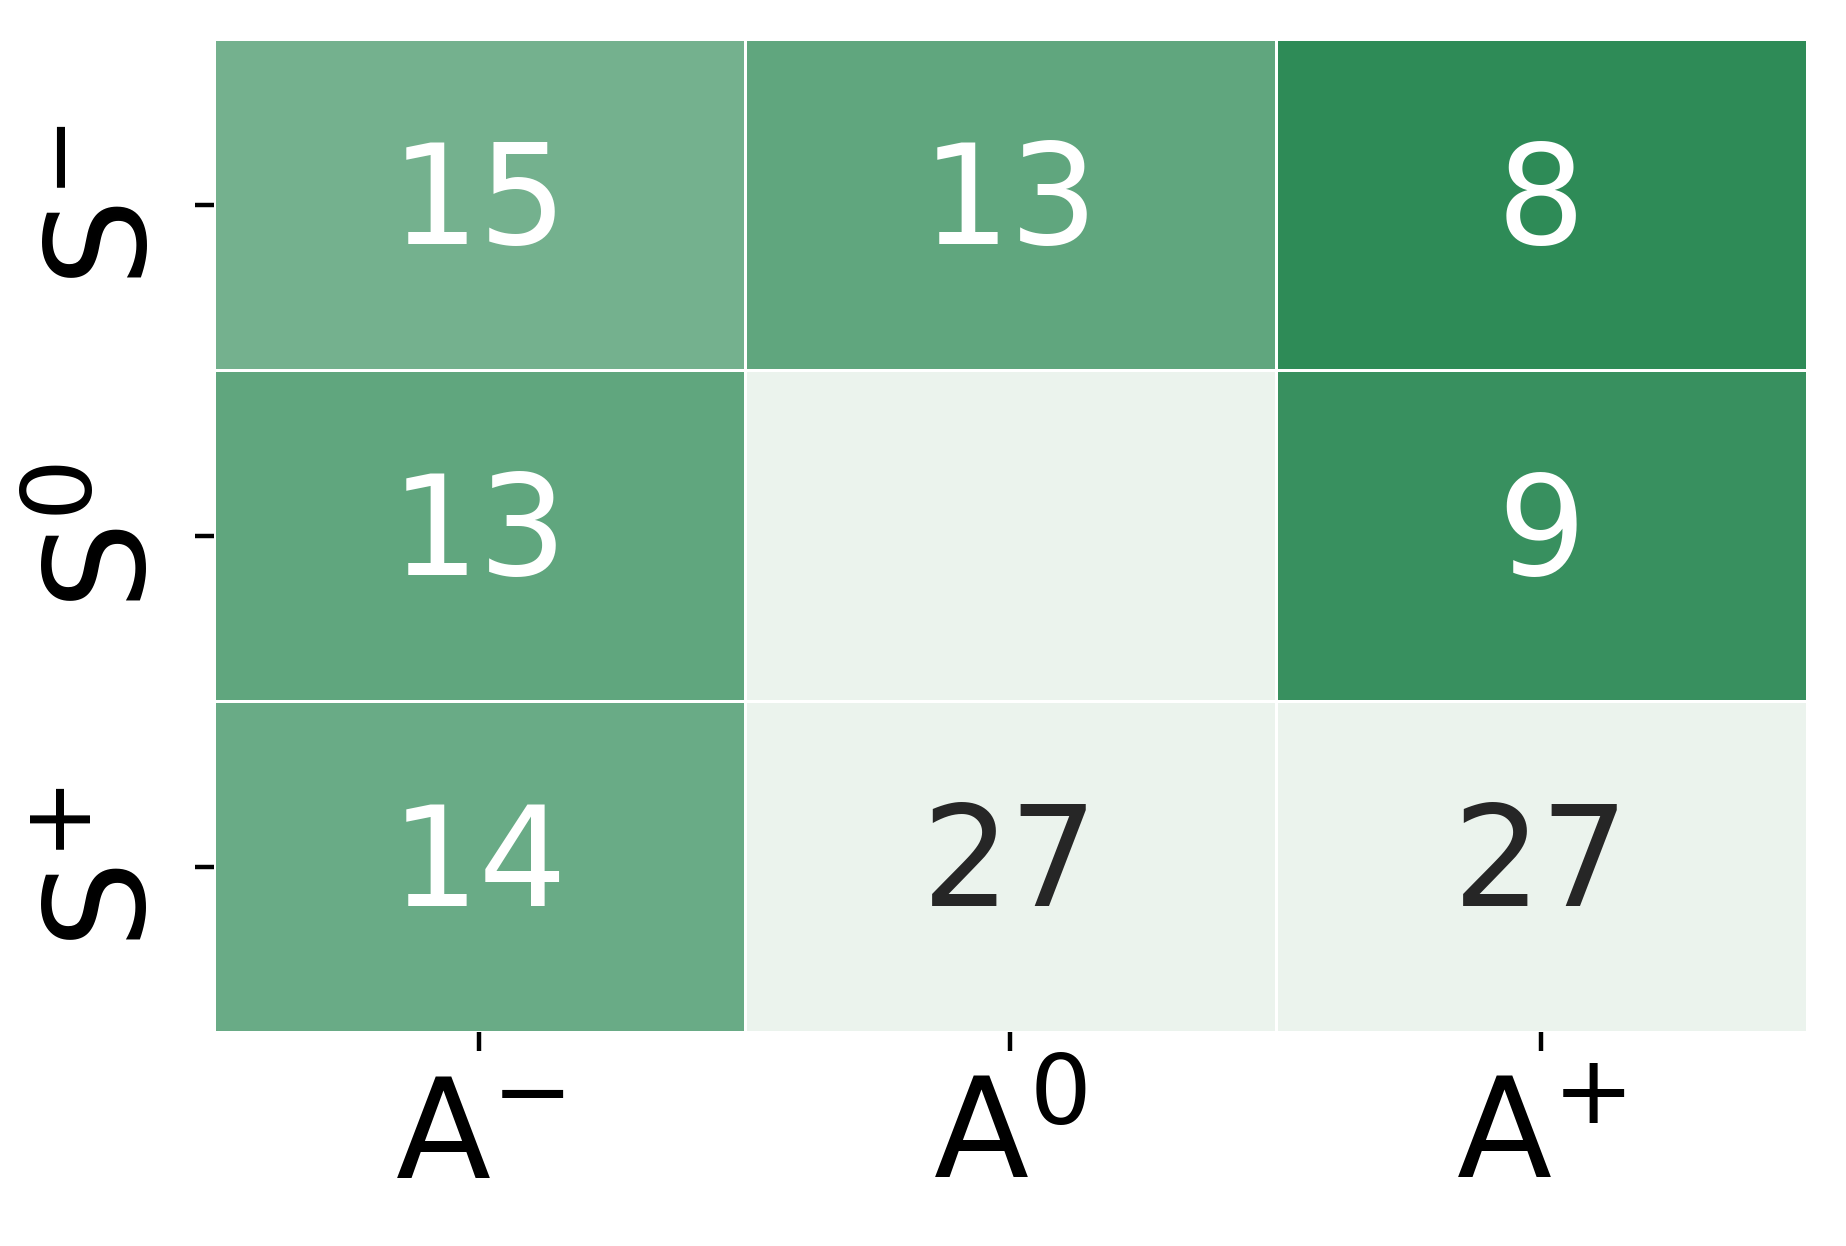

In [3]:
fig, axs = plt.subplots(1, 1, constrained_layout=1, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)


data = unit_cat
show_annot_array = data < 30

use_cmap = sns.light_palette("seagreen", as_cmap=True, reverse=True, n_colors=20)

heatmap = sns.heatmap(unit_cat, ax=axs, cbar=0, annot=True, 
                      linewidth=.5, cmap=use_cmap, vmax=27, 
                      vmin=8, annot_kws={"fontsize":25})
axs.set_xticklabels(['A$^{-}$', 'A$^{0}$', 'A$^{+}$'], fontsize=25)
axs.set_yticklabels(['S$^{-}$', 'S$^{0}$', 'S$^{+}$'], fontsize=25)

for text, show_annot in zip(axs.texts, show_annot_array.ravel()):
    text.set_visible(show_annot)

plt.show();


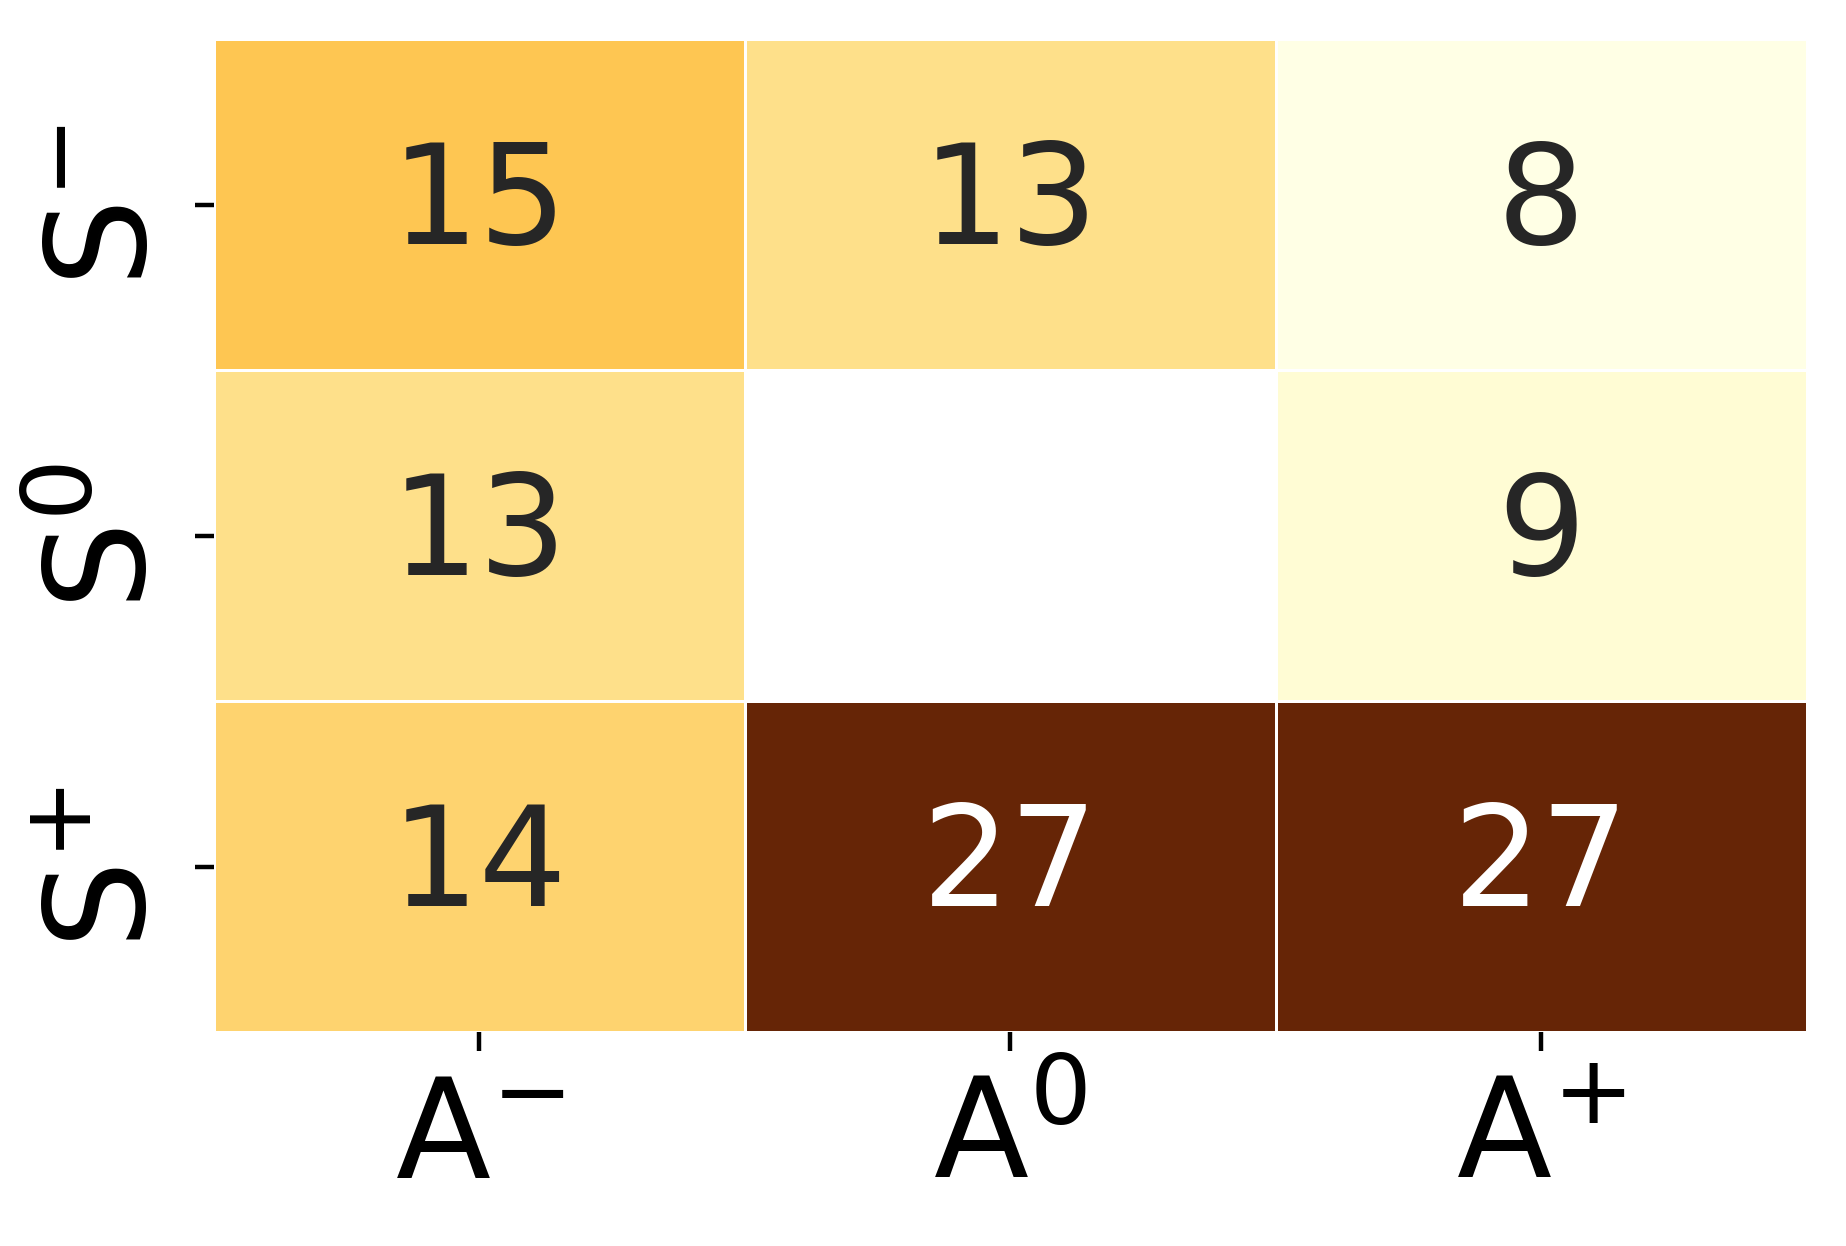

In [12]:
fig, axs = plt.subplots(1, 1, constrained_layout=1, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)


data = unit_cat
show_annot_array = data < 30

# Create a mask with False everywhere except for the (1, 1) cell, which will be True
mask = np.zeros_like(data, dtype=bool)
mask[1, 1] = True

use_cmap = sns.color_palette("YlOrBr", as_cmap=True, n_colors=20)

heatmap = sns.heatmap(unit_cat, ax=axs, cbar=0, annot=True, 
                      linewidth=.5, cmap=use_cmap, vmax=27, 
                      vmin=8, annot_kws={"fontsize":25}, mask=mask)
axs.set_xticklabels(['A$^{-}$', 'A$^{0}$', 'A$^{+}$'], fontsize=25)
axs.set_yticklabels(['S$^{-}$', 'S$^{0}$', 'S$^{+}$'], fontsize=25)
# Manually set the color of the middle cell (1, 1) to white
axs.add_patch(plt.Rectangle((1, 1), 1, 1, fill=True, color='white', lw=0))

plt.show();


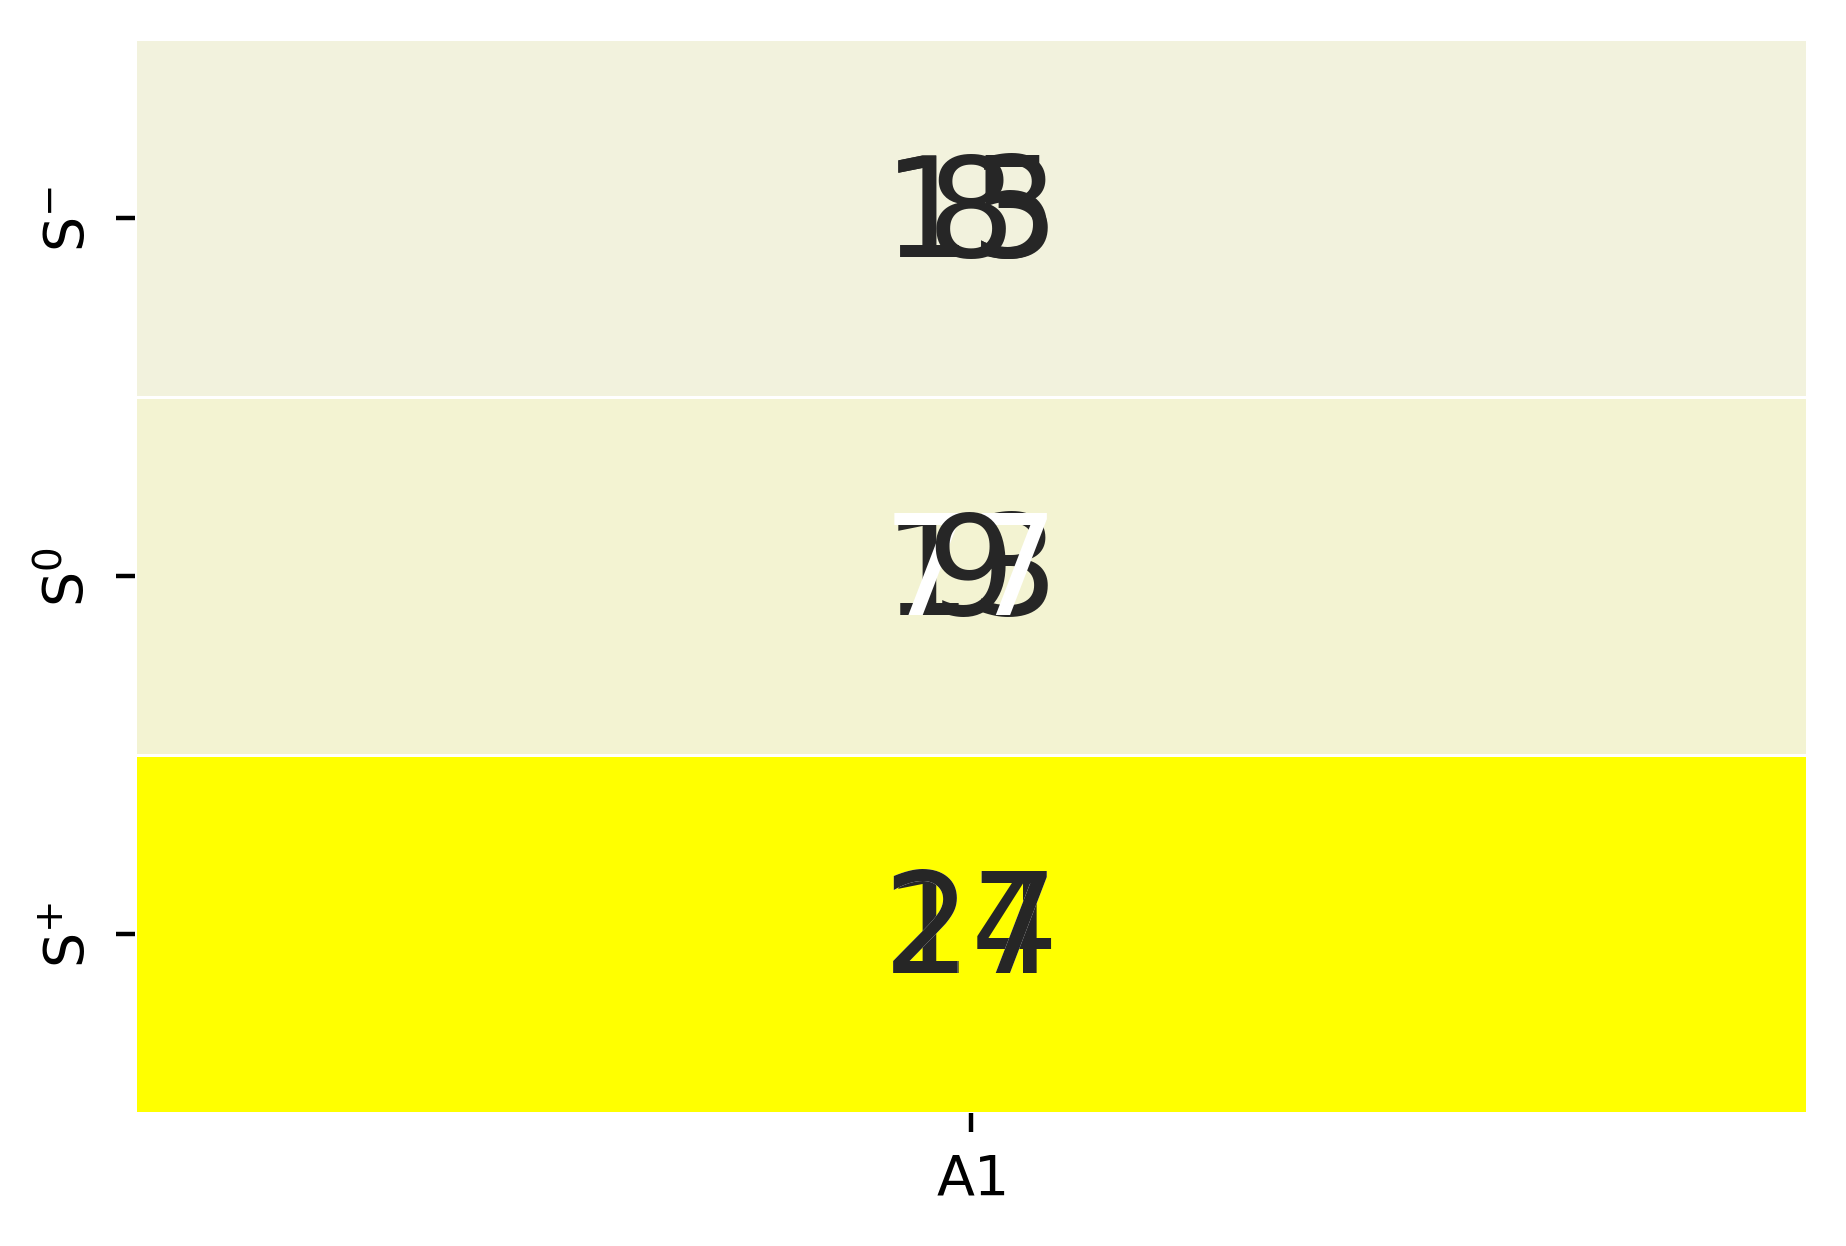

In [18]:
fig, axs = plt.subplots(1, 1, constrained_layout=1, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

# Create a mask with False everywhere except for the (1, 1) cell, which will be True
mask = np.zeros_like(data, dtype=bool)
mask[1, 1] = True

red_palette = sns.light_palette("red", as_cmap=True)
black_palette = sns.light_palette("black", as_cmap=True)
yellow_palette = sns.light_palette("yellow", as_cmap=True)

# Manually create three columns, applying a separate color palette for each
for col in range(unit_cat.shape[1]):
    # Extract the data for this column
    column_data = unit_cat[:, col].reshape(-1, 1)
    
    # Select the color palette based on the column index
    if col == 0:
        cmap = red_palette
    elif col == 1:
        cmap = black_palette
    else:
        cmap = yellow_palette
    
    # Plot the heatmap for this column only
    sns.heatmap(column_data, ax=axs, cbar=0, annot=True, fmt="d", linewidth=.5, 
                cmap=cmap, vmax=27, vmin=8, annot_kws={"fontsize":25}, 
                xticklabels=[f'A${{{col-1}}}$'], yticklabels=['S$^{-}$', 'S$^{0}$', 'S$^{+}$'],
                mask=np.zeros_like(column_data, dtype=bool), cbar_kws={'orientation': 'horizontal'},
                zorder=col)
    
#axs.set_xticklabels(['A$^{-}$', 'A$^{0}$', 'A$^{+}$'], fontsize=25)
#axs.set_yticklabels(['S$^{-}$', 'S$^{0}$', 'S$^{+}$'], fontsize=25)

plt.show();


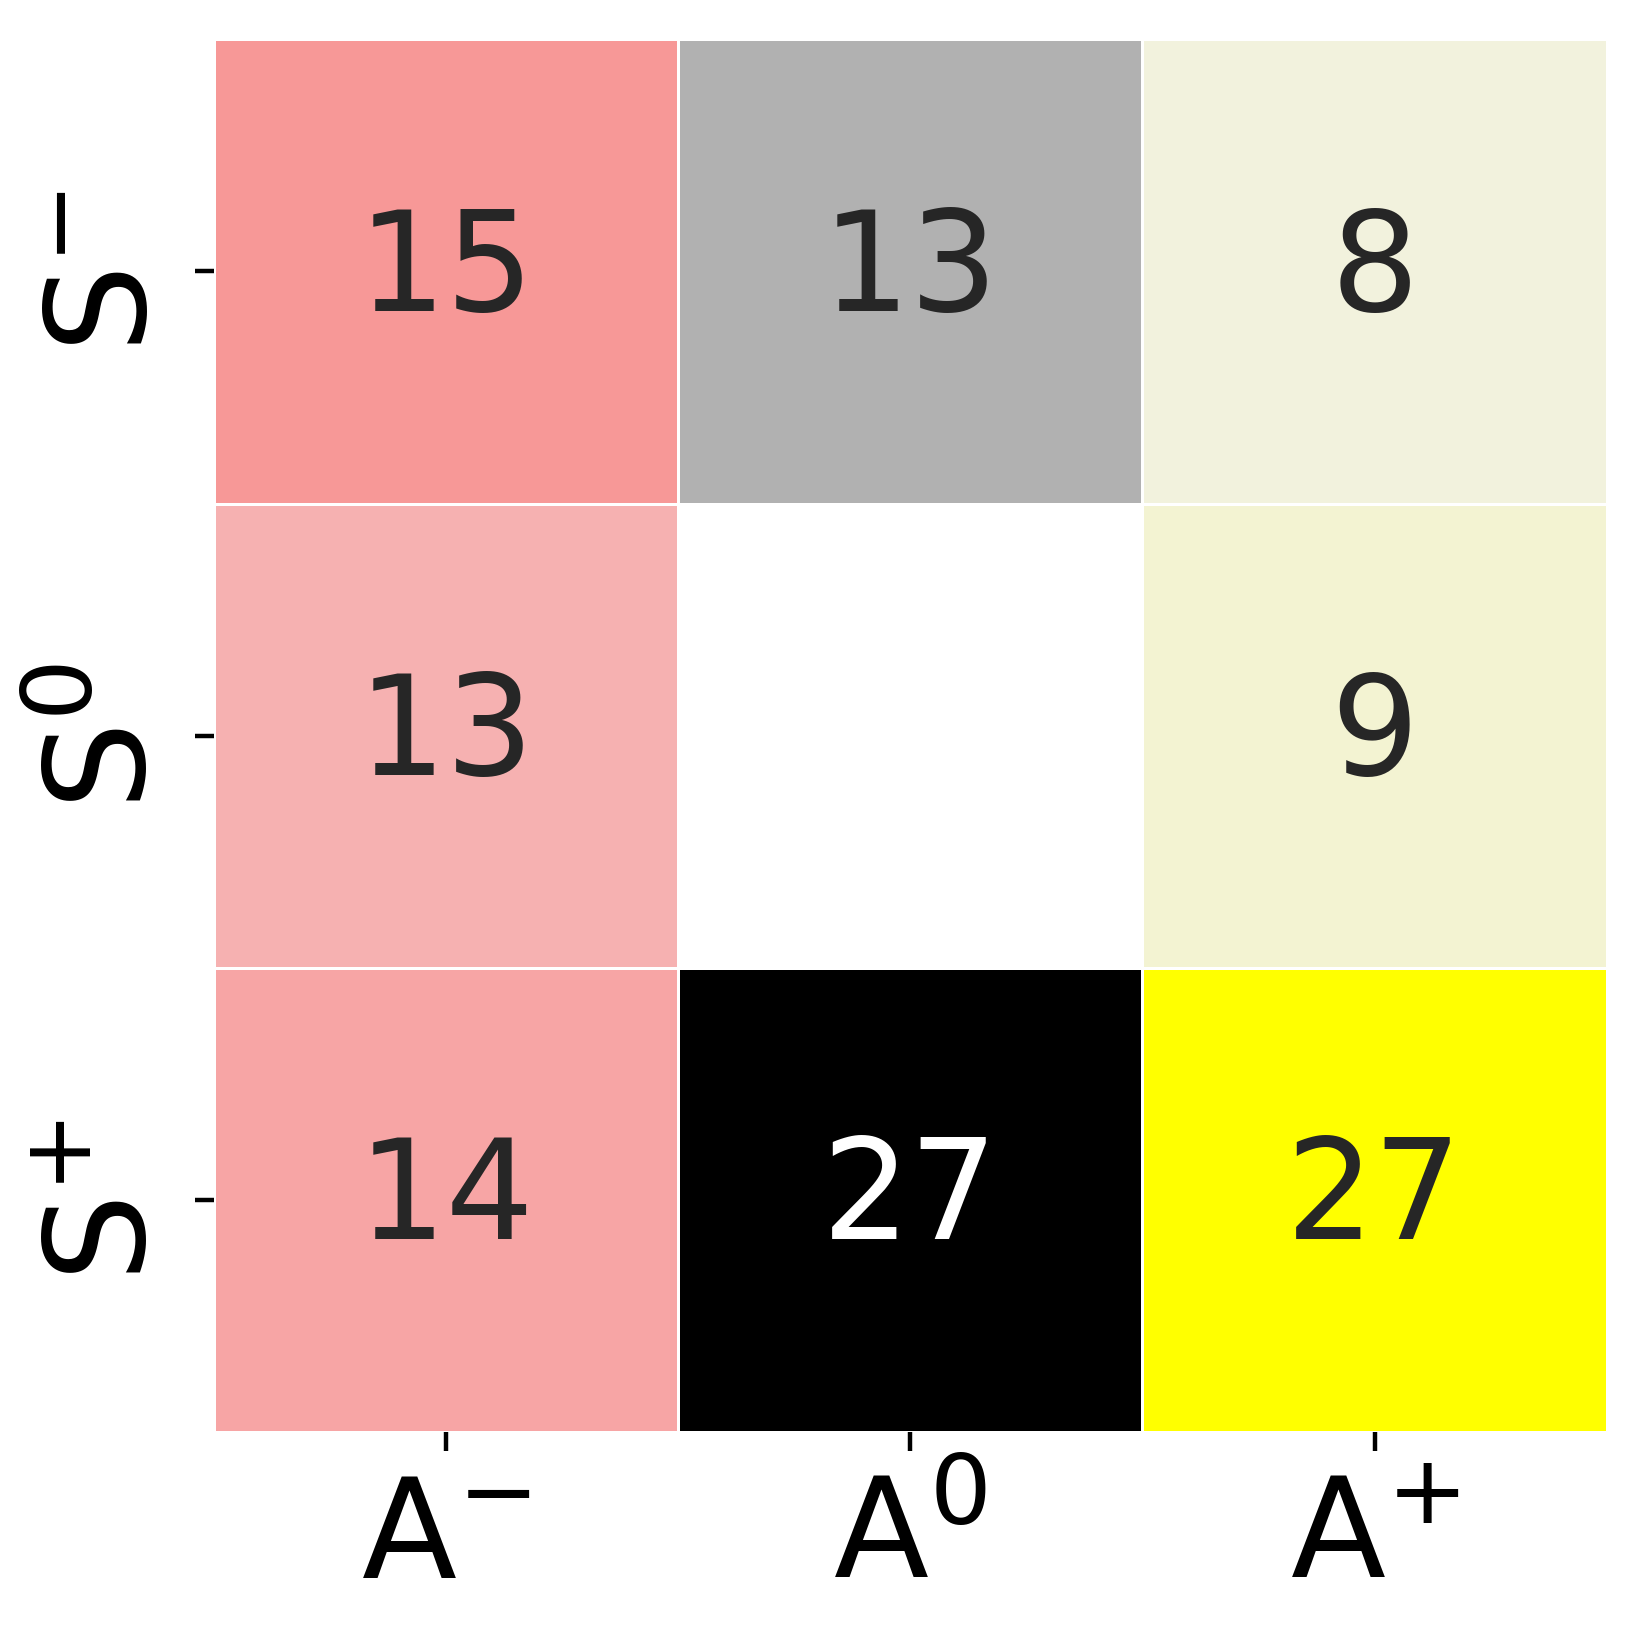

In [25]:

fig, axs = plt.subplots(1, 1, constrained_layout=1, figsize=(4, 4), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

# Create a colormap for each column
red_palette = sns.light_palette("red", as_cmap=True)
black_palette = sns.light_palette("black", as_cmap=True)
yellow_palette = sns.light_palette("yellow", as_cmap=True)

# Create a mask with False everywhere except for the (1, 1) cell, which will be True
mask = np.zeros_like(data, dtype=bool)
mask[1, 1] = True

# Go through each column and plot it separately in its respective place
for col in range(unit_cat.shape[1]):
    # Extract the data for this column
    column_data = unit_cat[:, col].reshape(-1, 1)
    
    # Select the color palette based on the column index
    if col == 0:
        cmap = red_palette
    elif col == 1:
        cmap = black_palette
    else:
        cmap = yellow_palette
    
    # Create a mask for the other columns (so they don't get overwritten)
    mask = np.ones_like(unit_cat, dtype=bool)
    mask[:, col] = False
    
    # Plot the heatmap for this column only, keeping its position with correct xticks
    sns.heatmap(unit_cat, mask=mask, ax=axs, cbar=0, annot=True, fmt="d", linewidth=.5, 
                cmap=cmap, vmax=27, vmin=8, annot_kws={"fontsize":25}, 
                xticklabels=['A$^{-}$', 'A$^{0}$', 'A$^{+}$'], yticklabels=['S$^{-}$', 'S$^{0}$', 'S$^{+}$'],
                zorder=col)

# Set the tick labels
axs.set_xticklabels(['A$^{-}$', 'A$^{0}$', 'A$^{+}$'], fontsize=25)
axs.set_yticklabels(['S$^{-}$', 'S$^{0}$', 'S$^{+}$'], fontsize=25)


# Manually add a white rectangle over the (1, 1) cell to ensure it stays white
axs.add_patch(plt.Rectangle((1, 1), 1, 1, fill=True, color='white', lw=0))


plt.show();